In [1]:
import numpy as np
from lib.ReadFiles import read_csv
from lib.Prepocessing import *
from lib.FaceDetection import find_faces

def reshape_dataset(X, y):
    # X = np.array(X).reshape(len(X),2304,-1).tolist()
    images = [np.array(dx) for dx in X]
    images = np.asarray(images, dtype=np.uint8)
    labels = np.array(y).tolist()
    return images, labels

emotions = ["Marah", "Jijik", "Takut","Senang", "Sedih", "Terkejut", "Biasa saja"]  # inisialisasi index dan emosi

In [2]:
_x, _y, _u = read_csv("input/fer2013_small.csv")
print(np.array(_x).shape)

x_new, y_new, u_new = [], [], []
for i, pixel in enumerate(_x):
	for norm, (x,y,w,h) in find_faces(np.array(pixel, dtype=np.uint8).reshape(48, 48)):
		if norm.size >0:
			x_new.append(pixel)
			y_new.append(_y[i])
			u_new.append(_u[i])
print(np.array(x_new).shape)

x_, y_ = image_equalizer(x_new, y_new)

(3815, 2304)
(1868, 2304)


In [3]:
import pandas as pd
dataframe = pd.DataFrame({"emotion": y_, "pixels": x_, "usage": u_new})

In [4]:
_x_train, _y_train = dataframe.loc[dataframe["usage"] == "Training","pixels"], dataframe.loc[dataframe["usage"] == "Training", "emotion"]

# _x_train, _y_train = dataframe["pixels"], dataframe["emotion"]

_x_train, _y_train = reshape_dataset(_x_train, _y_train)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    _x_train, _y_train, test_size=0.2,train_size=0.8, random_state=7)

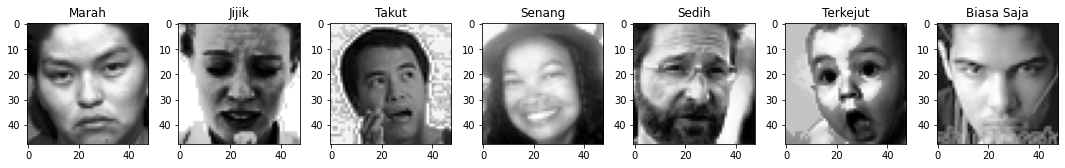

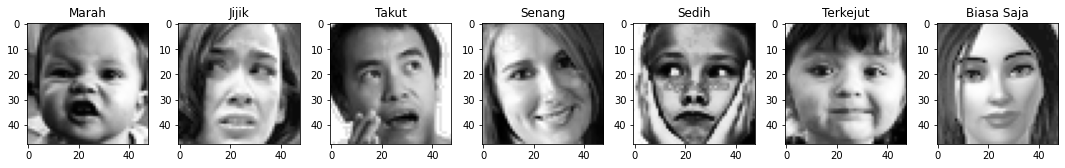

In [5]:
from lib.plot import *
plot_figure(x_train, y_train)
plot_figure(x_val, y_val)

0.23178807947019867


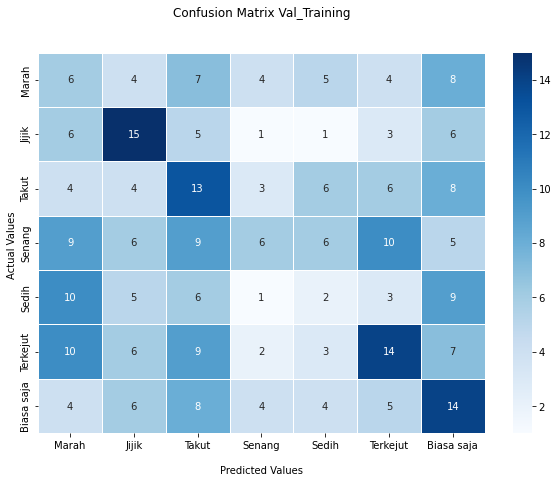

In [6]:
from lib.Fisherface import ModelFisherfaces
fisher = ModelFisherfaces(x_train, y_train)

pred = []
_val = []
for i in range(len(x_val)):
	_p = fisher.predict(x_val[i])
	_q = fisher.extract(x_val[i])
	pred.append(_p)
	_val.append(_q)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, pred))
cm_plot(y_val, pred, 'Val_Training')

Num GPUs Available:  0


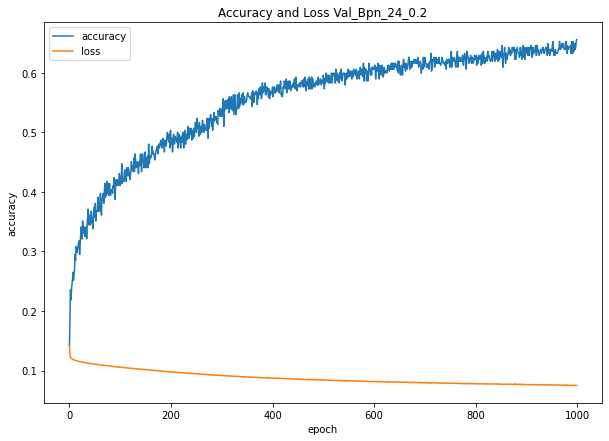

64.90066051483154
--- 90.35326313972473 seconds ---


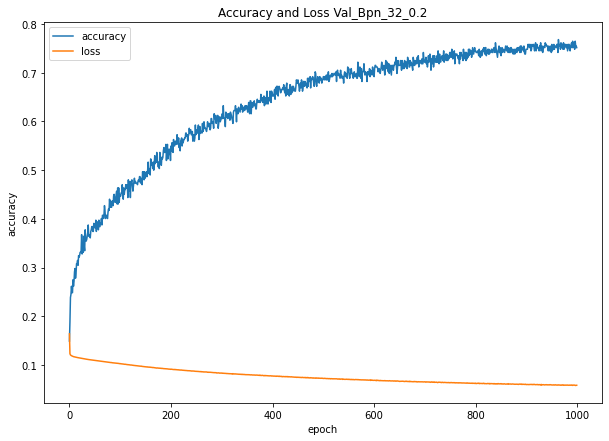

75.82781314849854
--- 85.96736025810242 seconds ---


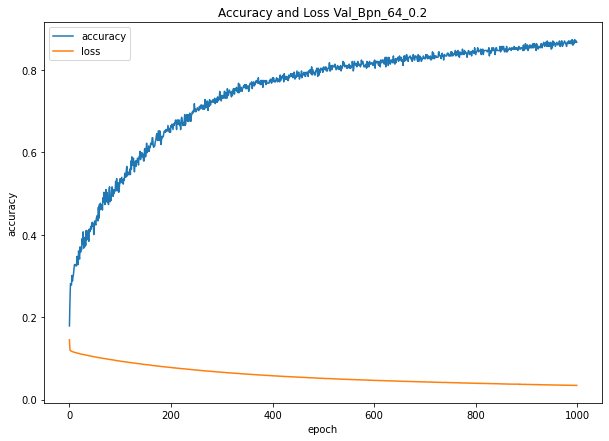

86.42383813858032
--- 84.3539183139801 seconds ---


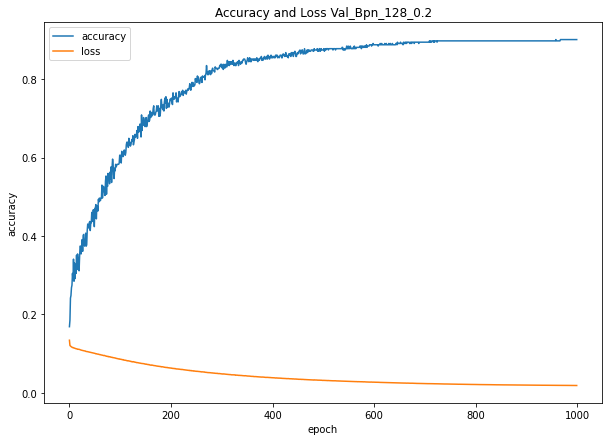

90.06622433662415
--- 84.75284767150879 seconds ---


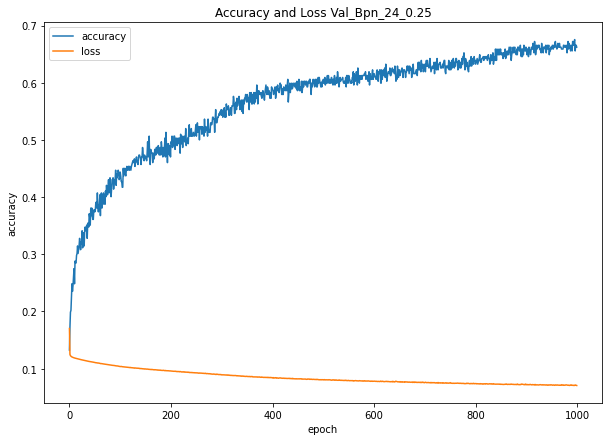

66.88741445541382
--- 84.90225028991699 seconds ---


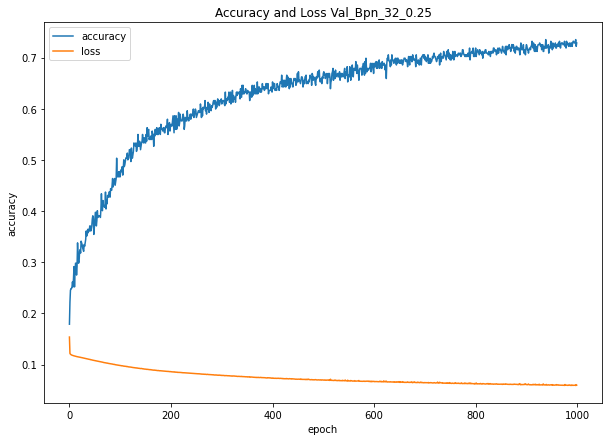

73.17880988121033
--- 84.65656042098999 seconds ---


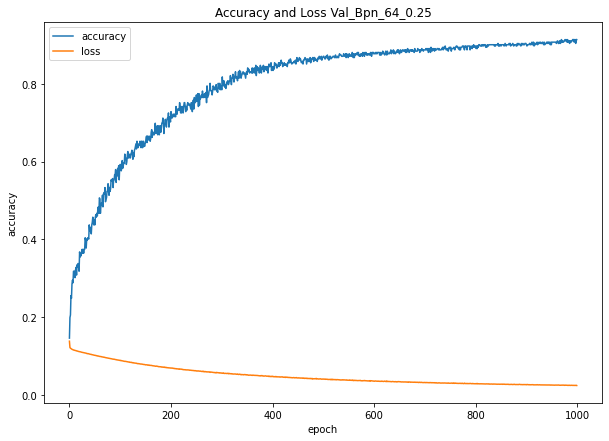

91.05960130691528
--- 82.73257684707642 seconds ---


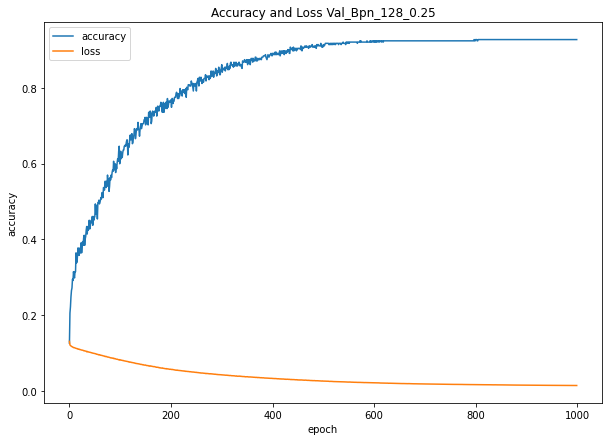

92.71523356437683
--- 79.86419820785522 seconds ---


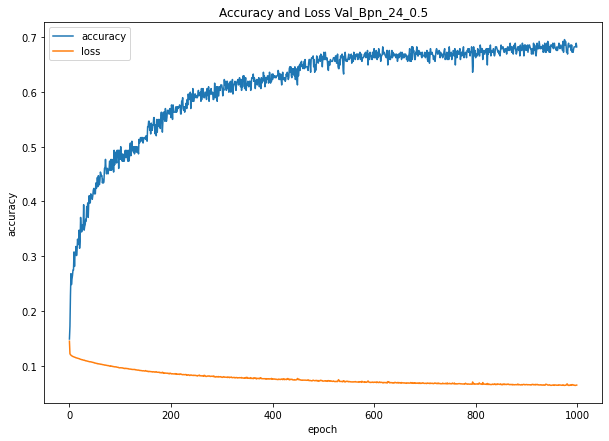

69.2052960395813
--- 87.50728583335876 seconds ---


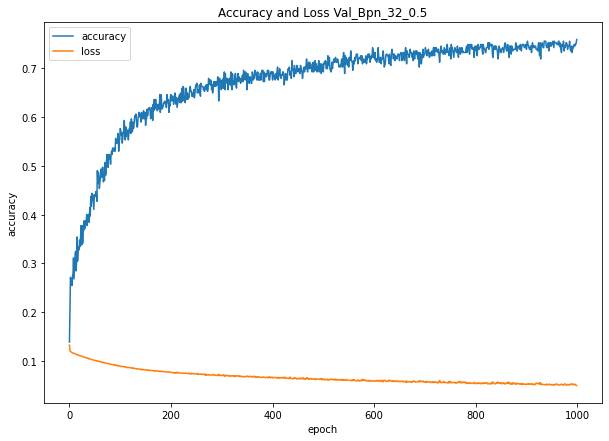

75.1655638217926
--- 83.09288477897644 seconds ---


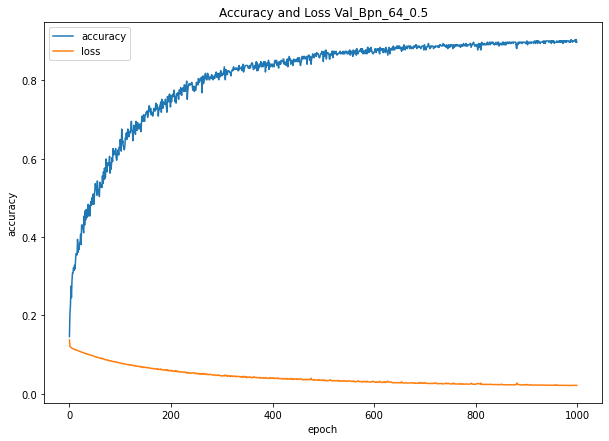

90.06622433662415
--- 83.02670335769653 seconds ---


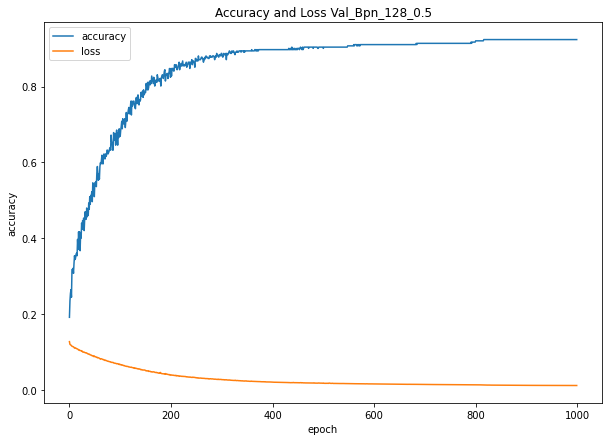

92.38410592079163
--- 79.70848751068115 seconds ---


In [7]:
from lib.Backpropagation import *
import time


h_layer = [24, 32, 64, 128]
l_rate = [0.2, 0.25, 0.5]

# compute(_val,y_val,6, 120, 7,1000, 0.2, "validation.h5")

# [[[compute(_val,y_val,6, _hidden, 7,1000, _lr)]for _hidden in h_layer]for _lr in l_rate]


for _rate in l_rate:
	for _h in h_layer:
		start_time = time.time()
		x ,y = normalize_data(_val, y_val)
		Bpn = ModelBackprop(_val,y_val,n_hidden = _h, lr= _rate)
		(loss,accuracy) = Bpn.model.evaluate(x ,y, verbose=0)
		history_plot(Bpn.history, title='Val_Bpn_'+ str(_h)+'_' + str(_rate))
		print(accuracy *100)
		print("--- %s seconds ---" % (time.time() - start_time))